# https://github.com/nimashekari320/LinearRegression-CarPrice_Assignment

# Import the relevant libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# (2) Data Preparation

In [2]:
#Importing CarPrice_Assignment Dataset

Car_Price = pd.read_csv("CarPrice_Assignment.csv")
Car_Price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Checking dimension of the data
Car_Price.shape

(205, 26)

In [4]:
Car_Price.describe(include = 'all').round()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205,205,205,205,205,205,205,205.0,205.0,205.0,205.0,205.0,205,205,205.0,205,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,174.0,66.0,54.0,2556.0,NaN,NaN,127.0,NaN,3.0,3.0,10.0,104.0,5125.0,25.0,31.0,13277.0
std,59.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,2.0,2.0,521.0,NaN,NaN,42.0,NaN,0.0,0.0,4.0,40.0,477.0,7.0,7.0,7989.0
min,1.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,141.0,60.0,48.0,1488.0,NaN,NaN,61.0,NaN,3.0,2.0,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,52.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,166.0,64.0,52.0,2145.0,NaN,NaN,97.0,NaN,3.0,3.0,9.0,70.0,4800.0,19.0,25.0,7788.0
50%,103.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,173.0,66.0,54.0,2414.0,NaN,NaN,120.0,NaN,3.0,3.0,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,154.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,183.0,67.0,56.0,2935.0,NaN,NaN,141.0,NaN,4.0,3.0,9.0,116.0,5500.0,30.0,34.0,16503.0


In [5]:
#Checking which columns consists of null values
Car_Price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
#Checking nunique data
Car_Price.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
#Checking data type across variables
Car_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
Car_Price['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [9]:
#Changing Symboling from int/numeric to object/categorical

Car_Price['symboling'] = Car_Price['symboling'].astype(str)
Car_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
Car_Price['symboling'].value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [11]:
#Description
Car_Price.describe().round()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,103.0,99.0,174.0,66.0,54.0,2556.0,127.0,3.0,3.0,10.0,104.0,5125.0,25.0,31.0,13277.0
std,59.0,6.0,12.0,2.0,2.0,521.0,42.0,0.0,0.0,4.0,40.0,477.0,7.0,7.0,7989.0
min,1.0,87.0,141.0,60.0,48.0,1488.0,61.0,3.0,2.0,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,52.0,94.0,166.0,64.0,52.0,2145.0,97.0,3.0,3.0,9.0,70.0,4800.0,19.0,25.0,7788.0
50%,103.0,97.0,173.0,66.0,54.0,2414.0,120.0,3.0,3.0,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,154.0,102.0,183.0,67.0,56.0,2935.0,141.0,4.0,3.0,9.0,116.0,5500.0,30.0,34.0,16503.0
max,205.0,121.0,208.0,72.0,60.0,4066.0,326.0,4.0,4.0,23.0,288.0,6600.0,49.0,54.0,45400.0


In [12]:
Car_Price['CarName'].value_counts()

toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                         2
m

In [13]:
Car_Price['CarName'].nunique()

147

In [14]:
Car_Price['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [15]:
#Extracting car company and car model from CarName
Car_Price[['car_company', 'car_model']] = Car_Price['CarName'].str.split(n = 1, expand = True)
Car_Price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [16]:
Car_Price.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
# Rectification of car company names
Car_Price.car_company = Car_Price.car_company.str.lower()

def replace_name(a,b):
    Car_Price.car_company.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

Car_Price.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
# Number of car companies in the data

car_number = Car_Price.groupby(['car_company'])['car_company'].count().sort_values(ascending = False)
car_number

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [19]:
#Checking for duplicate values

Car_Price.loc[Car_Price.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model


# EDA and Data Visualization
Approach - 1. Using Visualization and EDA techniques, to identify the variables which can be considered as significant variables for further analysis; 2. Using mixed technique for Linear Regression (RFE and Manual) to determine the best model for the analysis

In [20]:
#Exploring the dependent variable "price" and finding the benchmark

print(Car_Price.price.describe(percentiles = [0.25,0.50,0.75]).round(2))

# The mean and median of the price dataset it significantly different, which shows presence of outliers, 
# and high variance of car prices.

count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64


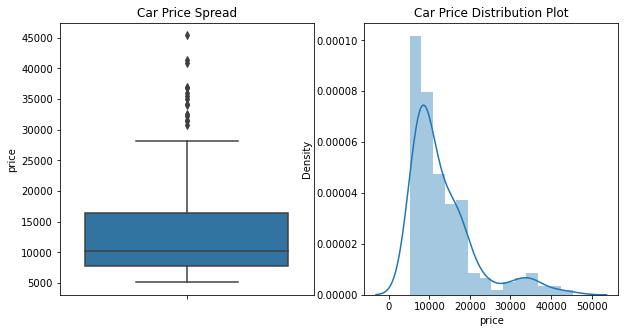

In [21]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Car Price Spread')
sns.boxplot(y = Car_Price.price)

plt.subplot(1,2,2)
plt.title('Car Price Distribution Plot')
sns.distplot(Car_Price.price)

plt.show()

# The majority of the data spread is lies below 15000. Hence, we see
# that there is a skewness towards the right of the distribution chart.

<AxesSubplot:xlabel='price', ylabel='Density'>

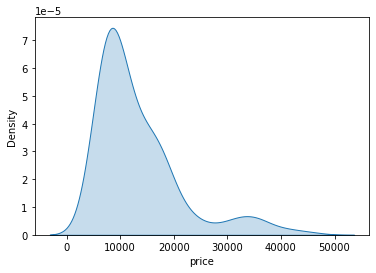

In [22]:
sns.kdeplot(Car_Price['price'], shade = True, legend = True)

In [23]:
q = Car_Price['price'].quantile(0.99)
Car_Price_1 = Car_Price[Car_Price['price'] < q]
Car_Price_1.describe().round()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,202.0,202.0,202.0,202.0,202.0,202.0,202.0,202.0,202.0,202.0,202.0,202.0,202.0,202.0,202.0
mean,104.0,99.0,174.0,66.0,54.0,2539.0,125.0,3.0,3.0,10.0,103.0,5130.0,25.0,31.0,12842.0
std,59.0,6.0,12.0,2.0,2.0,506.0,37.0,0.0,0.0,4.0,39.0,476.0,6.0,7.0,7192.0
min,1.0,87.0,141.0,60.0,48.0,1488.0,61.0,3.0,2.0,7.0,48.0,4150.0,13.0,17.0,5118.0
25%,52.0,94.0,166.0,64.0,52.0,2145.0,97.0,3.0,3.0,9.0,70.0,4800.0,19.0,25.0,7778.0
50%,104.0,97.0,173.0,66.0,54.0,2412.0,115.0,3.0,3.0,9.0,95.0,5200.0,24.0,30.0,10222.0
75%,155.0,101.0,181.0,66.0,56.0,2919.0,141.0,4.0,3.0,9.0,116.0,5500.0,30.0,36.0,16482.0
max,205.0,116.0,203.0,72.0,60.0,4066.0,326.0,4.0,4.0,23.0,288.0,6600.0,49.0,54.0,37028.0


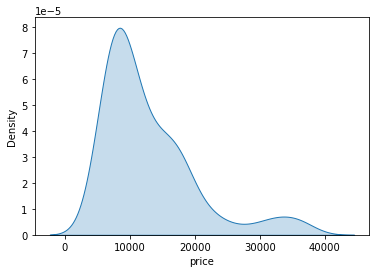

In [24]:
sns.kdeplot(Car_Price_1['price'], shade = True)
Car_Price = Car_Price_1.copy()
Car_Price = Car_Price.reset_index(drop = True)

In [25]:
Car_Price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi,100ls
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi,fox
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi,100ls
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi,5000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi,4000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi,5000s (diesel)


# Data Analysing

In [26]:
# Standard Correlation Coefficient [-1 , 1]  OR
# Pearson R: to check Linear correlation among the variables

corr_matrix = Car_Price.corr()
corr_matrix['price'].sort_values(ascending = False).round(2)

price               1.00
enginesize          0.85
curbweight          0.83
horsepower          0.81
carwidth            0.75
carlength           0.66
wheelbase           0.54
boreratio           0.54
compressionratio    0.11
carheight           0.10
stroke              0.07
peakrpm            -0.05
car_ID             -0.07
citympg            -0.68
highwaympg         -0.69
Name: price, dtype: float64

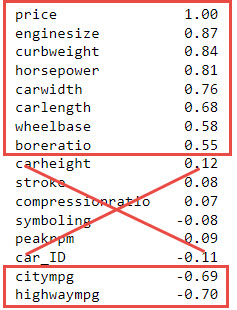

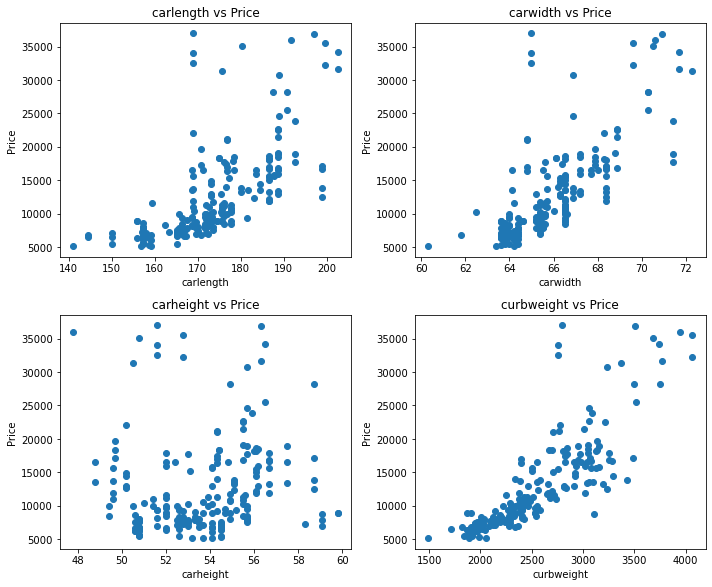

In [27]:
# Analysing data using car dimensions (length, width, height and weight )

def scatter(x, fig):
    plt.subplot(5, 2, fig)
    plt.scatter(Car_Price[x], Car_Price['price'])
    plt.title(x + ' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize = (10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

# Car length, width and weight has a positive correlation with car price, so as they increase, so does price.
# Car height does not indicate having any correlation with car price.

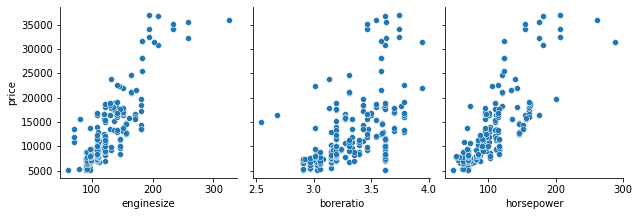

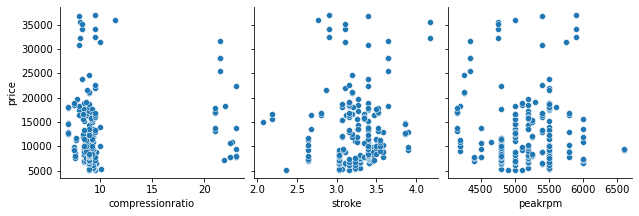

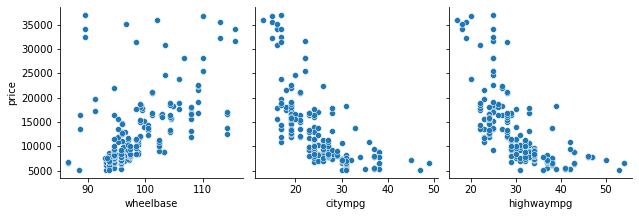

In [28]:
# Analysing the data across other features of car

def pl(x,y,z):
    sns.pairplot(Car_Price, x_vars = [x,y,z], y_vars = 'price', size = 3, aspect = 1, kind ='scatter')
    plt.show()

pl('enginesize', 'boreratio', 'horsepower') 
pl('compressionratio', 'stroke', 'peakrpm')
pl('wheelbase', 'citympg', 'highwaympg')

# Enginesize, boreratio, horsepower and wheelbase has a positive correlation with car price
# citympg and highwaympg has a negative correlation with car price
# We cannot find any significant relationship between stroke, compression ratio, peakrpm and car price respectively.

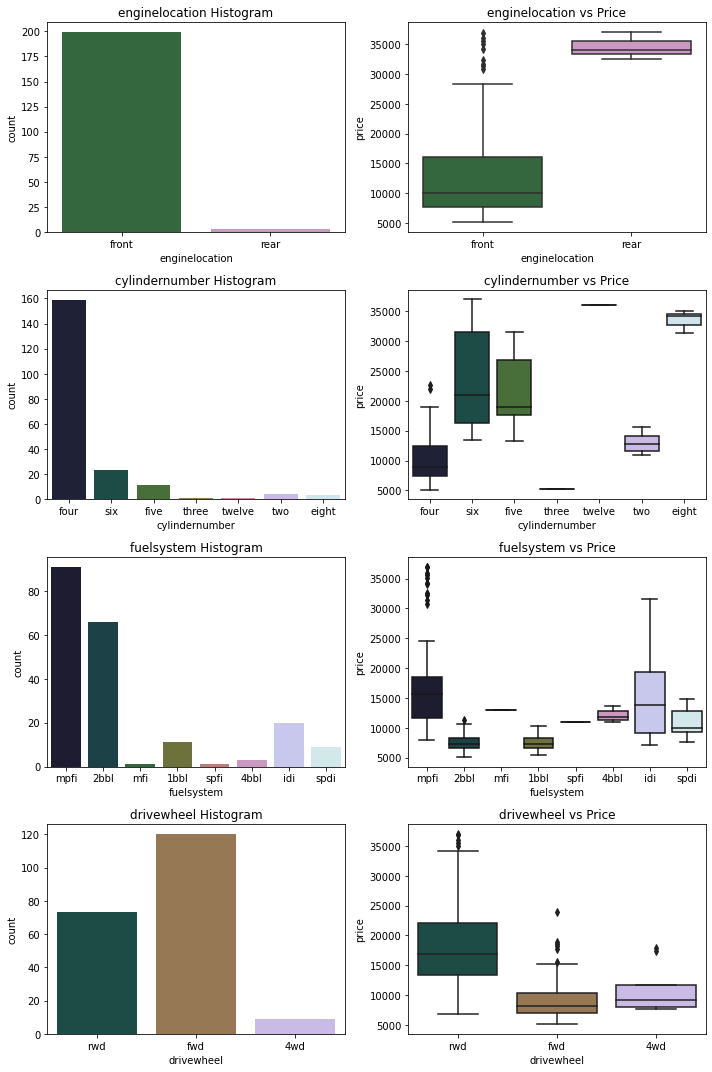

In [29]:
# Other car charactericstics analysis

def plot_count(x, fig):
    plt.subplot(4, 2, fig)
    plt.title(x + ' Histogram')
    sns.countplot(Car_Price[x], palette = ("cubehelix"))
    plt.subplot(4, 2, (fig + 1))
    plt.title(x + ' vs Price')
    sns.boxplot(x = Car_Price[x], y = Car_Price.price, palette = ("cubehelix"))
    
plt.figure(figsize = (10, 15))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

# Enginelocation type "front" is on the higher side in the data based on count and also, based on the car price front 
# enginelocation is on the lower side (~5500 to 15500).
# four cylinder number is the most common among cars, while mpfi and 2bbl are more common fuelsystem. rwd drivewheel is 
# among the expensive side of car price.

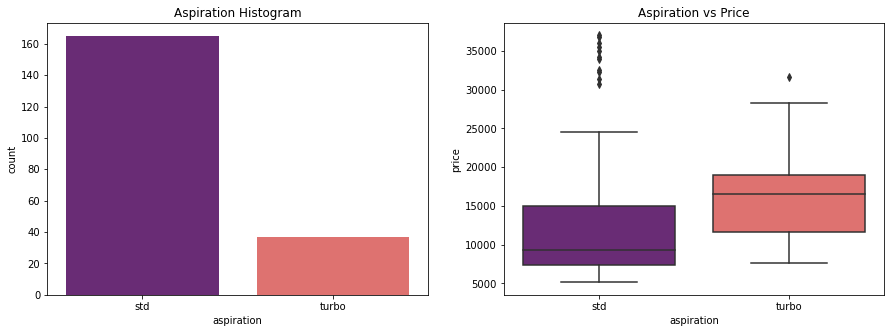

In [30]:
#Aspiration

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(Car_Price.aspiration, palette = ("magma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x = Car_Price.aspiration, y = Car_Price.price, palette = ("magma"))
plt.show()

#turbo aspiration is among the costlier cars

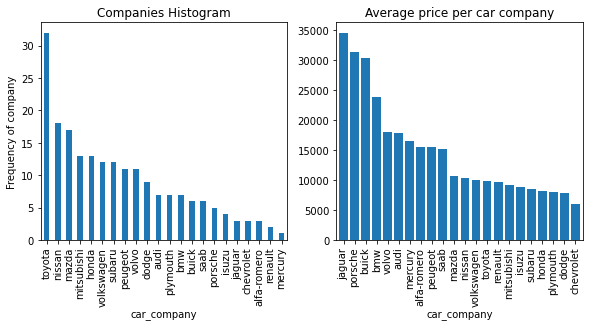

In [31]:
# Exploring Car Company

plt.figure(figsize = (25, 6))

plt.subplot(1,3,1)
plt1 = Car_Price.car_company.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'car_company', ylabel = 'Frequency of company') 

plt.subplot(1,3,2)
df_car_company = Car_Price.groupby(['car_company'])['price'].mean().sort_values(ascending = False)
plt.title('Average price per car company')
ax_car_company = df_car_company.plot(kind = 'bar', figsize = (15,4),width = 0.8, edgecolor = None)

plt.show()

#Based on popularity toyota is highest, on the other hand jaguar has the highest average price

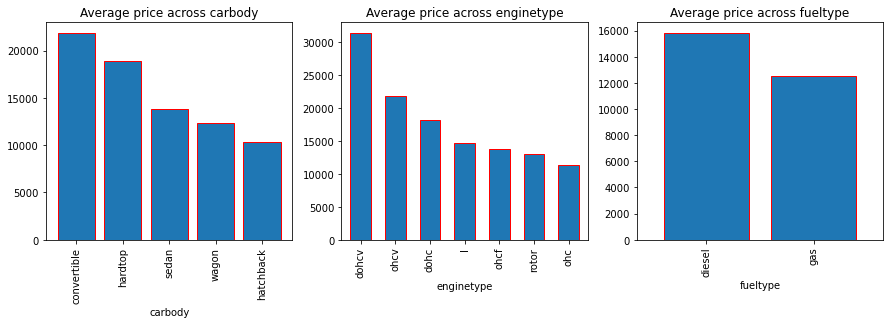

In [32]:
# Average Price analysis across other car factors

plt.figure(figsize = (25, 6))

plt.subplot(1, 3, 1)
df_carbody = Car_Price.groupby(['carbody'])['price'].mean().sort_values(ascending = False)
plt.title('Average price across carbody')
ax_carbody = df_carbody.plot(kind='bar', figsize = (15,4), width = 0.8, edgecolor = 'red')

plt.subplot(1,3,2)
df_enginetype = Car_Price.groupby(['enginetype'])['price'].mean().sort_values(ascending = False)
plt.title('Average price across enginetype')
ax_enginetype = df_enginetype.plot(kind='bar', figsize = (15,4), width = 0.6, edgecolor = 'red')

plt.subplot(1,3,3)
df_fueltype = Car_Price.groupby(['fueltype'])['price'].mean().sort_values(ascending = False)
plt.title('Average price across fueltype')
ax_fueltype = df_fueltype.plot(kind='bar', figsize = (15,4), width = 0.8, edgecolor = 'red')
plt.show()

# Hardtop, convertible are the most costly among carbody, ohcv is the most costly among enginetype and diesel fueltype
# cars are typically expensive in the US market

In [33]:
# Creating a derived column bin as car_price_range based on mean price of each company

Car_Price['price'] = Car_Price['price'].astype('int')
Data_company = Car_Price.copy()

tbl_company = Data_company. groupby(['car_company'])['price'].mean()
Data_company = Data_company. merge(tbl_company.reset_index(), how ='left', on = 'car_company')

bins = [0, 10000, 20000, 40000]
Car_Price_bin = ['Budget','Medium','Highend']

Car_Price['car_price_range'] = pd.cut(Data_company.price_x , bins, right = False, labels = Car_Price_bin)
Car_Price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model,car_price_range
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero,giulia,Medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero,stelvio,Medium
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero,Quadrifoglio,Medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,audi,100 ls,Medium
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,audi,100ls,Medium


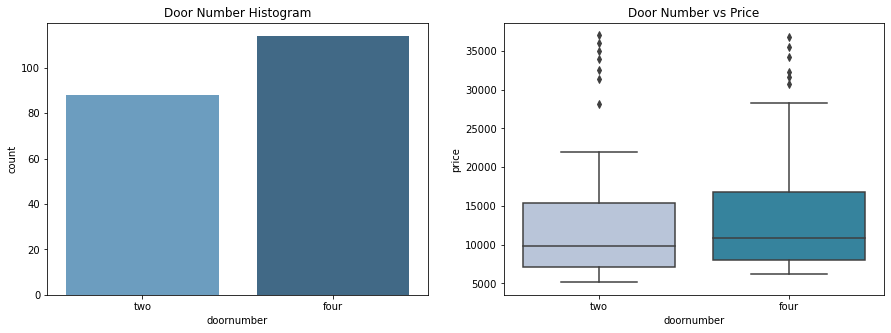

In [34]:
# Door number

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Door Number Histogram')
sns.countplot(Car_Price.doornumber, palette = ("Blues_d"))
plt.subplot(1, 2, 2)
plt.title('Door Number vs Price')
sns.boxplot(x = Car_Price.doornumber, y = Car_Price.price, palette = ("PuBuGn"))
plt.show()

# Car with 4 doors are more common, however there is no significant difference in between the prices of 2 door and 4 door cars

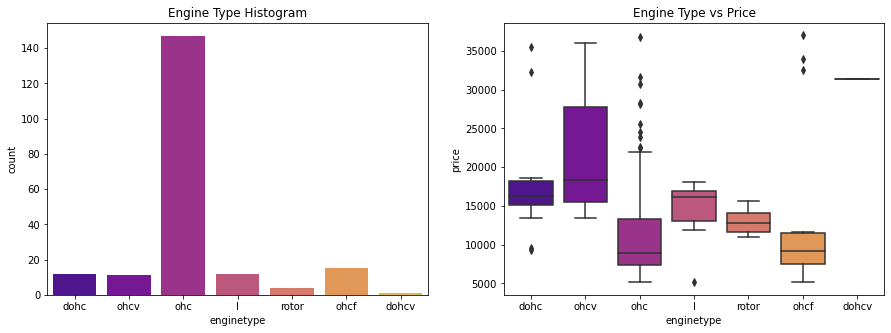

In [35]:
# Engine Type

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(Car_Price.enginetype, palette=("plasma"))
plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x = Car_Price.enginetype, y=Car_Price.price, palette=("plasma"))

plt.show()

# ohc engine type is the most common type among others, while ohcv engine type cars are expensive side in comparison to others

# We have identified few variables from the data using EDA techniques, analysing the data overall and also taking help of data visualization. We shall proceed with the modeling
Finalysing the dataset with the identified variables

Creating dummy variables

Linear Regression Modeling

In [36]:
#Creating the new data set using identified variables

carprice_lr = Car_Price[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 
                         'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength',
                         'carwidth','car_price_range']]
carprice_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,car_price_range
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,Medium


In [37]:
carprice_lr.describe(include = 'all').round()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,car_price_range
count,202.0,202,202,202,202,202.0,202.0,202,202,202.0,202.0,202.0,202.0,202.0,202
unique,NaN,2,2,5,3,NaN,NaN,7,7,NaN,NaN,NaN,NaN,NaN,3
top,NaN,gas,std,sedan,fwd,NaN,NaN,ohc,four,NaN,NaN,NaN,NaN,NaN,Budget
freq,NaN,182,165,94,120,NaN,NaN,147,159,NaN,NaN,NaN,NaN,NaN,100
mean,12842.0,NaN,NaN,NaN,NaN,99.0,2539.0,NaN,NaN,125.0,3.0,103.0,174.0,66.0,NaN
std,7192.0,NaN,NaN,NaN,NaN,6.0,506.0,NaN,NaN,37.0,0.0,39.0,12.0,2.0,NaN
min,5118.0,NaN,NaN,NaN,NaN,87.0,1488.0,NaN,NaN,61.0,3.0,48.0,141.0,60.0,NaN
25%,7778.0,NaN,NaN,NaN,NaN,94.0,2145.0,NaN,NaN,97.0,3.0,70.0,166.0,64.0,NaN
50%,10222.0,NaN,NaN,NaN,NaN,97.0,2412.0,NaN,NaN,115.0,3.0,95.0,173.0,66.0,NaN
75%,16482.0,NaN,NaN,NaN,NaN,101.0,2919.0,NaN,NaN,141.0,4.0,116.0,181.0,66.0,NaN


In [38]:
# Shape on the new dataset
carprice_lr.shape

(202, 15)

In [39]:
# Info on the new dataset
carprice_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   price            202 non-null    int32   
 1   fueltype         202 non-null    object  
 2   aspiration       202 non-null    object  
 3   carbody          202 non-null    object  
 4   drivewheel       202 non-null    object  
 5   wheelbase        202 non-null    float64 
 6   curbweight       202 non-null    int64   
 7   enginetype       202 non-null    object  
 8   cylindernumber   202 non-null    object  
 9   enginesize       202 non-null    int64   
 10  boreratio        202 non-null    float64 
 11  horsepower       202 non-null    int64   
 12  carlength        202 non-null    float64 
 13  carwidth         202 non-null    float64 
 14  car_price_range  202 non-null    category
dtypes: category(1), float64(4), int32(1), int64(3), object(6)
memory usage: 21.8+ KB


In [40]:
# Standard Correlation Coefficient [-1 , 1]  OR
# Pearson R: to check Linear correlation among the variables

corr_matrix = carprice_lr.corr()
corr_matrix['price'].sort_values(ascending = False).round(2)

price         1.00
enginesize    0.85
curbweight    0.83
horsepower    0.81
carwidth      0.75
carlength     0.66
wheelbase     0.54
boreratio     0.54
Name: price, dtype: float64

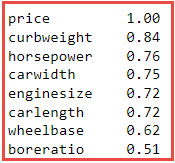

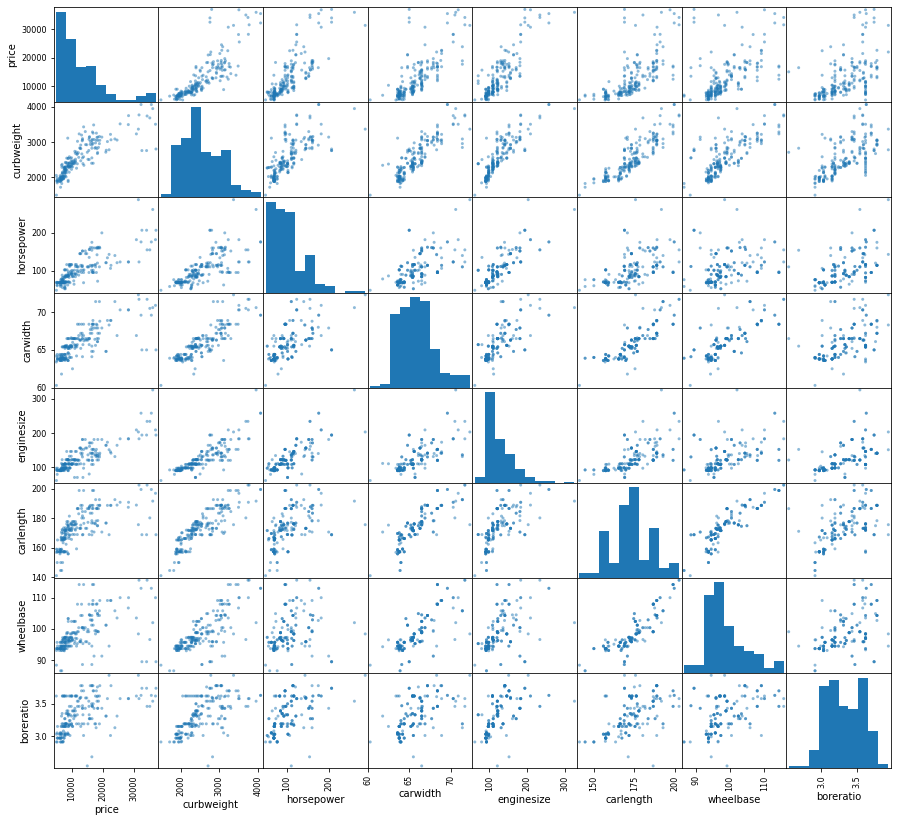

In [41]:
# Plotting to check correlation among the variables with scatter_matrix

from pandas.plotting import scatter_matrix

features = ['price', 'curbweight', 'horsepower', 'carwidth', 'enginesize', 'carlength', 'wheelbase', 'boreratio']
scatter_matrix(carprice_lr[features], figsize = (15,14))
plt.show()

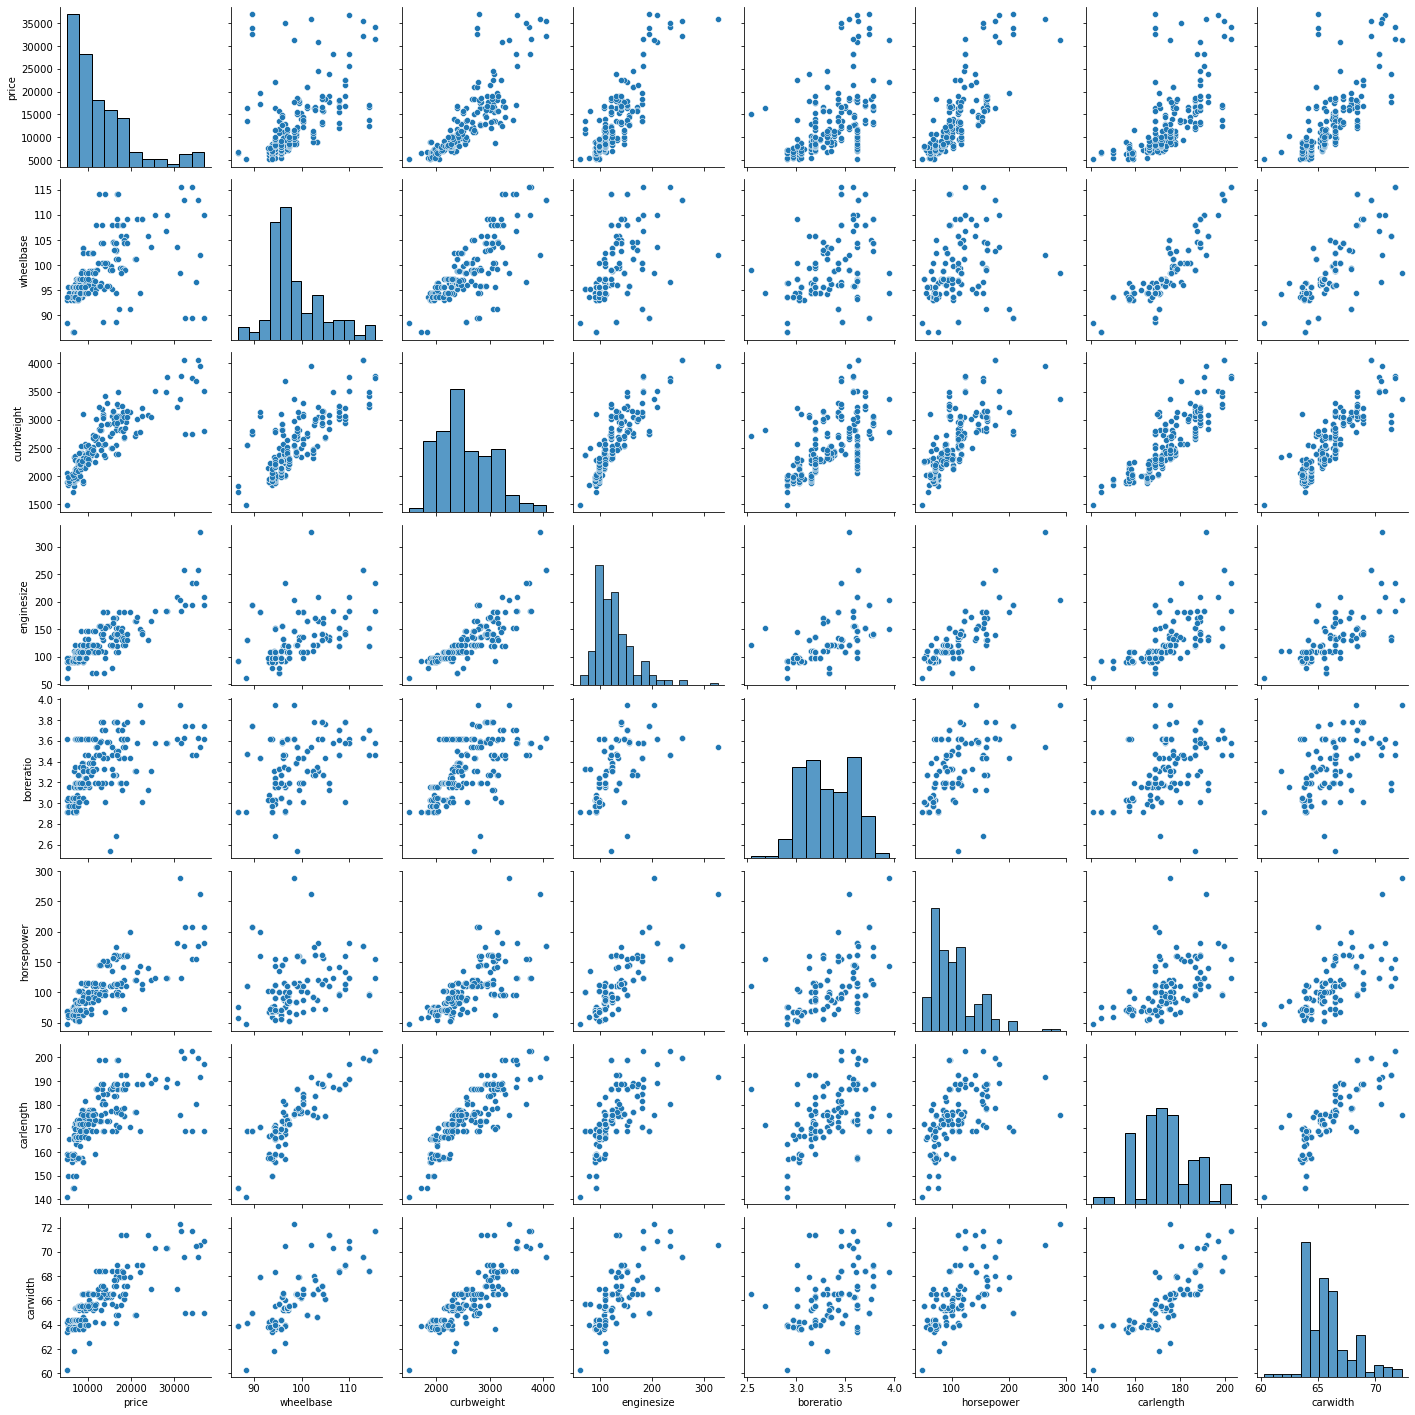

In [42]:
# Plotting to check correlation among the variables with sns

sns.pairplot(carprice_lr)
plt.show()

<AxesSubplot:xlabel='curbweight', ylabel='price'>

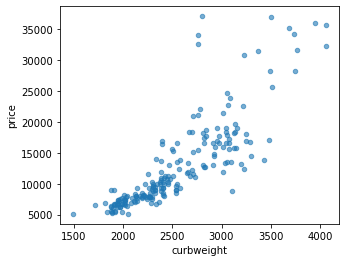

In [43]:
carprice_lr.plot(kind = 'scatter', x = 'curbweight', y = 'price', figsize = (5,4), alpha = 0.6)

# 

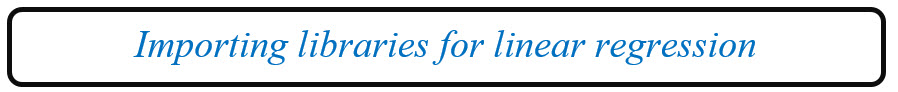

In [44]:
# Importing libraries for linear regression

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 2) : Checking the Regression Assumptions

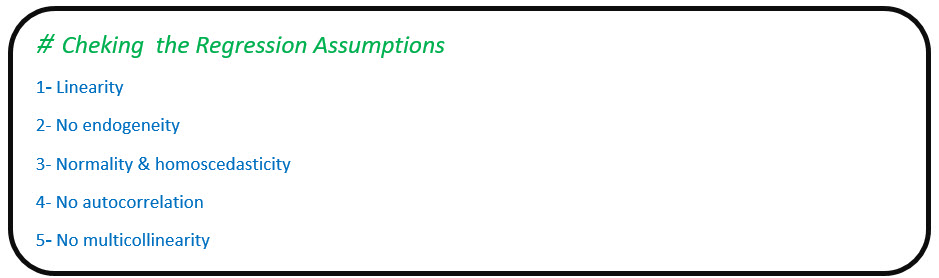

# 1- Linearity

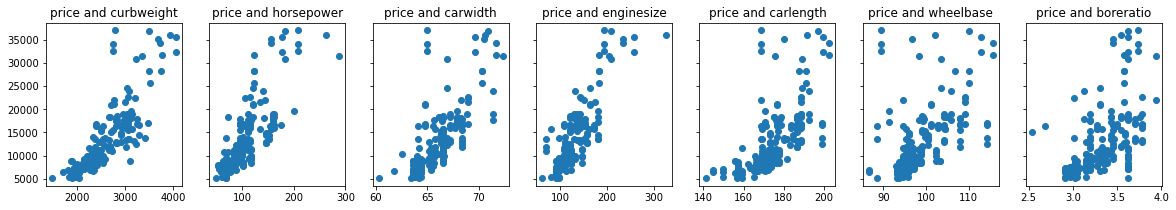

In [45]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey = True, figsize =(20,3))

ax1.scatter(carprice_lr['curbweight'], carprice_lr['price'])
ax1.set_title('price and curbweight')

ax2.scatter(carprice_lr['horsepower'], carprice_lr['price'])
ax2.set_title('price and horsepower')

ax3.scatter(carprice_lr['carwidth'], carprice_lr['price'])
ax3.set_title('price and carwidth')

ax4.scatter(carprice_lr['enginesize'], carprice_lr['price'])
ax4.set_title('price and enginesize')

ax5.scatter(carprice_lr['carlength'], carprice_lr['price'])
ax5.set_title('price and carlength')

ax6.scatter(carprice_lr['wheelbase'], carprice_lr['price'])
ax6.set_title('price and wheelbase')

ax7.scatter(carprice_lr['boreratio'], carprice_lr['price'])
ax7.set_title('price and boreratio')

plt.show()

# The Categorical datas have themselves linearity and plots in the below showe that the Numerical datas have Linearity. 
# So the linearity condition is exists.

# 2- No Endogeneity
We will talk about this issue later.

KeyWords: Hausman test, IV, 2SLS, GMM, ...

See the following link:

A good example: https://python.quantecon.org/ols.html#Endogeneity

How we can intrpret our results: https://stats.stackexchange.com/questions/210696/how-to-interpret-hausman-test-results

Documentations of linearmodels library: https://bashtage.github.io/linearmodels/doc/iv/introduction.html

3- Normality and Homoscedasticity
Just check the above graphs. Since intercept has been included in our model, so the mean of error is ZERO.

4- No Autocorrelation
We should not be worry, because our data is not a time series data or a panel data.

5- No Multicollinearity
VIF (Variance Inflation Factor) and its application in detecting Multicollinearity
If VIF > 10, then multicollinearity is high and we should remove that item.

# 3- Normality & homoscedasticity

Since intercept has been included in our model, so the mean of error is zero and Normality is exists

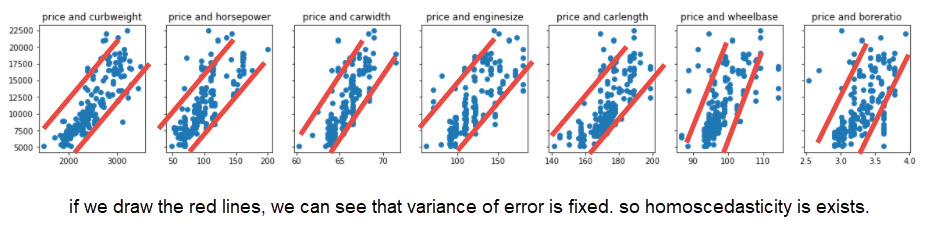

# 4- No Autocorrelation

autocorrelation is in time series data or panel data, we didnt have any panel data or time series data here.

# 5- No multicollinearity

In [46]:
carprice_lr.columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = carprice_lr[['price', 'curbweight', 'horsepower', 'carwidth', 'enginesize', 'carlength', 'wheelbase', 'boreratio']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["features"] = variables.columns

vif.round()

# but we will delete features that have high VIF after using RFE technique and showing their p-values.
# please wait ...

,VIF,features
0,21.0,price
1,257.0,curbweight
2,38.0,horsepower
3,1229.0,carwidth
4,68.0,enginesize
5,1572.0,carlength
6,1716.0,wheelbase
7,267.0,boreratio


# step 3) : create dummy variabels

In [47]:
carprice_lr = pd.get_dummies(carprice_lr , drop_first = True)

carprice_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_Medium,car_price_range_Highend
0,13495,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [48]:
carprice_lr.shape

(202, 30)

# spliting data into train & test set

In [49]:
# Dividing data into train and test set

np.random.seed(0)
df_train, df_test = train_test_split(carprice_lr, train_size = 0.7, test_size = 0.3, random_state = 42)

In [50]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_Medium,car_price_range_Highend
97,9549,97.2,2302,120,3.33,97,173.4,65.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
31,5399,93.7,1837,79,2.91,60,150.0,64.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
12,20970,101.2,2710,164,3.31,121,176.8,64.8,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
35,7295,96.5,2024,92,2.92,76,157.1,63.9,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
119,7609,93.7,2191,98,2.97,68,167.3,63.8,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


# Standard Scaler

In [51]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
numeric_features = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

In [52]:
#Check after modification
df_train.head().round(3)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_Medium,car_price_range_Highend
97,0.143,0.324,0.316,0.223,0.637,0.229,0.525,0.430,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
31,0.009,0.195,0.135,0.068,0.298,0.056,0.145,0.325,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
12,0.513,0.471,0.474,0.389,0.621,0.341,0.580,0.395,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
35,0.070,0.298,0.208,0.117,0.306,0.131,0.260,0.316,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
119,0.081,0.195,0.273,0.140,0.347,0.093,0.426,0.307,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [53]:
df_train.shape

(141, 30)

In [54]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_Medium,car_price_range_Highend
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.242662,0.371662,0.408052,0.238619,0.622283,0.253629,0.534279,0.476297,0.914894,0.170213,0.021277,0.326241,0.475177,0.148936,0.602837,0.347518,0.0,0.070922,0.709220,0.063830,0.063830,0.014184,0.035461,0.808511,0.113475,0.007092,0.007092,0.014184,0.432624,0.085106
std,0.216733,0.208672,0.195224,0.144639,0.215259,0.174429,0.194561,0.176204,0.280035,0.377159,0.144819,0.470508,0.501164,0.357295,0.491055,0.477879,0.0,0.257610,0.455741,0.245321,0.245321,0.118672,0.185601,0.394876,0.318304,0.084215,0.084215,0.118672,0.497206,0.280035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.086814,0.224265,0.264158,0.135849,0.491935,0.102804,0.417886,0.324561,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.169257,0.312500,0.359193,0.184906,0.620968,0.219626,0.521951,0.456140,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.352309,0.470588,0.552366,0.301887,0.806452,0.317757,0.682927,0.543860,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 97 to 102
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    141 non-null    float64
 1   wheelbase                141 non-null    float64
 2   curbweight               141 non-null    float64
 3   enginesize               141 non-null    float64
 4   boreratio                141 non-null    float64
 5   horsepower               141 non-null    float64
 6   carlength                141 non-null    float64
 7   carwidth                 141 non-null    float64
 8   fueltype_gas             141 non-null    uint8  
 9   aspiration_turbo         141 non-null    uint8  
 10  carbody_hardtop          141 non-null    uint8  
 11  carbody_hatchback        141 non-null    uint8  
 12  carbody_sedan            141 non-null    uint8  
 13  carbody_wagon            141 non-null    uint8  
 14  drivewheel_fwd           

In [56]:
# Check correlation using pearson R

corr_matrix = df_train.corr()
corr_matrix['price'].sort_values(ascending = False).round(2)

price                      1.00
enginesize                 0.86
curbweight                 0.83
horsepower                 0.82
car_price_range_Highend    0.77
carwidth                   0.71
carlength                  0.65
drivewheel_rwd             0.62
boreratio                  0.51
wheelbase                  0.49
cylindernumber_six         0.49
enginetype_ohcv            0.40
cylindernumber_twelve      0.30
carbody_hardtop            0.29
car_price_range_Medium     0.29
aspiration_turbo           0.17
cylindernumber_five        0.16
carbody_sedan              0.12
enginetype_l               0.08
enginetype_ohcf            0.05
fueltype_gas               0.03
cylindernumber_two         0.01
enginetype_rotor           0.01
carbody_wagon             -0.03
cylindernumber_three      -0.09
carbody_hatchback         -0.26
enginetype_ohc            -0.44
drivewheel_fwd            -0.57
cylindernumber_four       -0.64
enginetype_dohcv            NaN
Name: price, dtype: float64

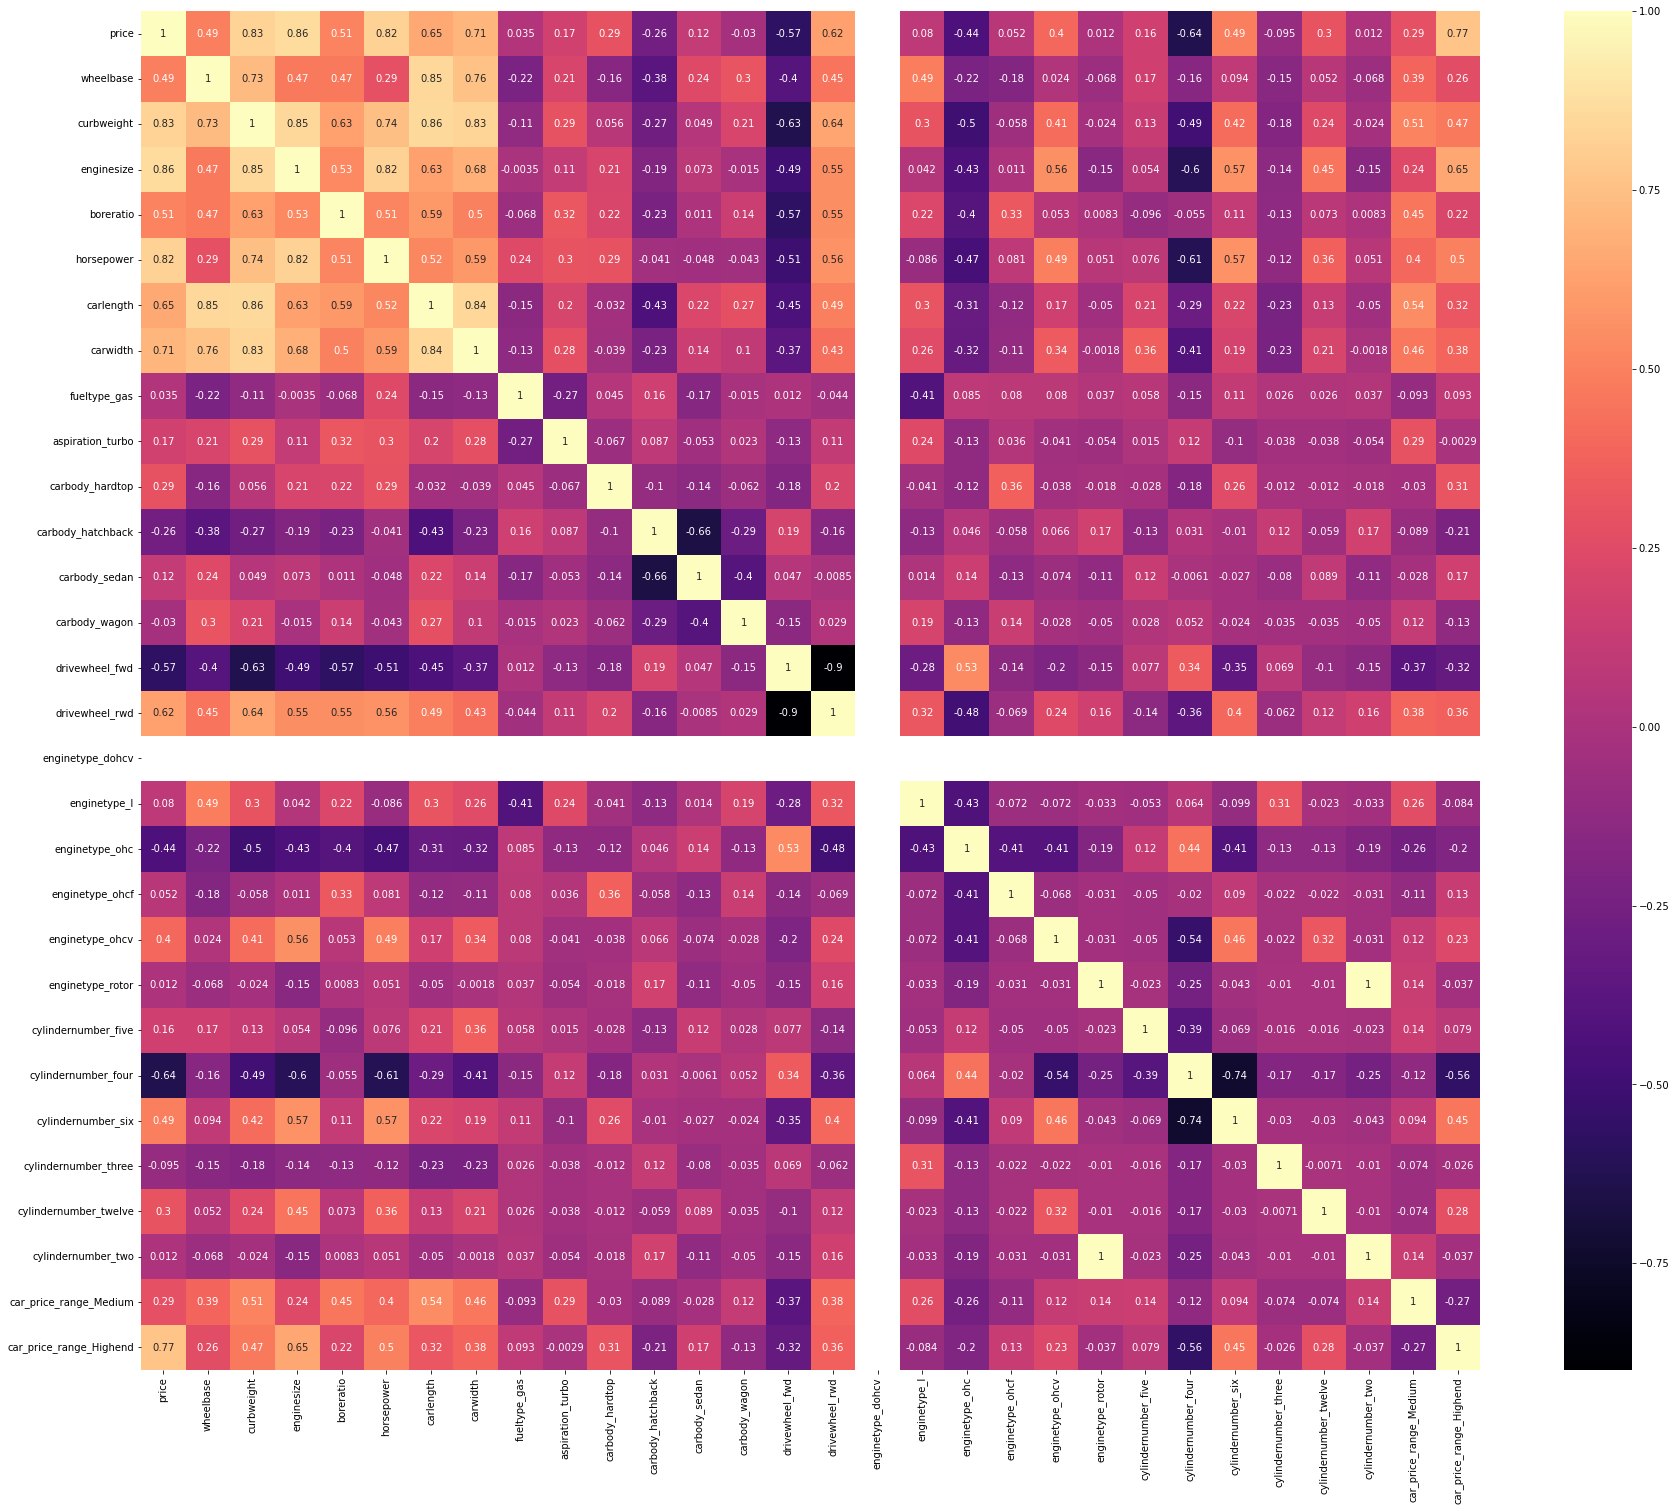

In [57]:
# Check correlation using heatmap

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap = "magma")
plt.show()

# Car Price is highly correlated to curbweight (0.82), horsepower (0.77), carwidth (0.74), enginesize (0.73),
# car_price_range_Medium(72), carlength (0.70)

# Linear Regression Modeling


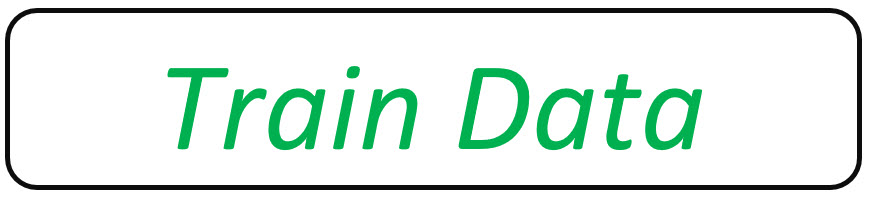

In [58]:
#Dividing the data into X and y variable

X_train = df_train
y_train = df_train.pop('price')

# y_train is label of train set

In [59]:
X_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_Medium,car_price_range_Highend
97,0.323529,0.315749,0.222642,0.637097,0.228972,0.525203,0.429825,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
31,0.194853,0.135376,0.067925,0.298387,0.056075,0.144715,0.324561,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
12,0.470588,0.474011,0.388679,0.620968,0.341121,0.580488,0.394737,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
35,0.297794,0.207913,0.116981,0.306452,0.130841,0.260163,0.315789,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
119,0.194853,0.272692,0.139623,0.346774,0.093458,0.426016,0.307018,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [60]:
y_train.head().round(2)

97     0.14
31     0.01
12     0.51
35     0.07
119    0.08
Name: price, dtype: float64

In [61]:
# Using RFE technique to find the most significant variables (Top 10)

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [62]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_ ))

[('wheelbase', False, 8),
 ('curbweight', True, 1),
 ('enginesize', False, 18),
 ('boreratio', False, 2),
 ('horsepower', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', True, 1),
 ('carbody_hardtop', False, 7),
 ('carbody_hatchback', False, 4),
 ('carbody_sedan', False, 6),
 ('carbody_wagon', False, 5),
 ('drivewheel_fwd', False, 15),
 ('drivewheel_rwd', False, 17),
 ('enginetype_dohcv', False, 20),
 ('enginetype_l', False, 3),
 ('enginetype_ohc', False, 19),
 ('enginetype_ohcf', False, 16),
 ('enginetype_ohcv', False, 14),
 ('enginetype_rotor', False, 10),
 ('cylindernumber_five', False, 12),
 ('cylindernumber_four', False, 11),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 13),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 9),
 ('car_price_range_Medium', True, 1),
 ('car_price_range_Highend', True, 1)]

In [63]:
# List of top 10 variables using RFE techniques
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'carlength', 'carwidth', 'fueltype_gas', 'aspiration_turbo', 'cylindernumber_six', 'cylindernumber_twelve', 'car_price_range_Medium', 'car_price_range_Highend'], dtype='object')

In [64]:
# Data extract using RFE technique for modeling
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head().round(2)

,curbweight,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,cylindernumber_six,cylindernumber_twelve,car_price_range_Medium,car_price_range_Highend
97,0.32,0.23,0.53,0.43,1,0,0,0,0,0
31,0.14,0.06,0.14,0.32,1,0,0,0,0,0
12,0.47,0.34,0.58,0.39,1,0,1,0,0,1
35,0.21,0.13,0.26,0.32,1,0,0,0,0,0
119,0.27,0.09,0.43,0.31,1,0,0,0,0,0


In [65]:
X_train_rfe.shape

(141, 10)

In [66]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 97 to 102
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   curbweight               141 non-null    float64
 1   horsepower               141 non-null    float64
 2   carlength                141 non-null    float64
 3   carwidth                 141 non-null    float64
 4   fueltype_gas             141 non-null    uint8  
 5   aspiration_turbo         141 non-null    uint8  
 6   cylindernumber_six       141 non-null    uint8  
 7   cylindernumber_twelve    141 non-null    uint8  
 8   car_price_range_Medium   141 non-null    uint8  
 9   car_price_range_Highend  141 non-null    uint8  
dtypes: float64(4), uint8(6)
memory usage: 6.3 KB


In [67]:
# Now using the manual technique and detailed statistics to perform linear modeling

def build_model(X,y):
    X = sm.add_constant(X)    # Adding the constant
    lm = sm.OLS(y,X).fit()    # Fitting the model
    print(lm.summary())       # Model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [68]:
#Running Model 1

X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     222.0
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.32e-76
Time:                        02:39:48   Log-Likelihood:                 220.12
No. Observations:                 141   AIC:                            -418.2
Df Residuals:                     130   BIC:                            -385.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [69]:
# we got only p-values with for Loop

x = X_train_new.copy()
y = y_train.copy()
fit = sm.OLS(y,x).fit()
for i in range(0,10):
    print([i], ':' , fit.pvalues[i].round(3))

[0] : 0.359
[1] : 0.0
[2] : 0.0
[3] : 0.111
[4] : 0.111
[5] : 0.0
[6] : 0.0
[7] : 0.0
[8] : 0.001
[9] : 0.0


In [70]:
X_train_rfe.shape

(141, 10)

In [71]:
X_train_rfe.head()

,curbweight,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,cylindernumber_six,cylindernumber_twelve,car_price_range_Medium,car_price_range_Highend
97,0.315749,0.228972,0.525203,0.429825,1,0,0,0,0,0
31,0.135376,0.056075,0.144715,0.324561,1,0,0,0,0,0
12,0.474011,0.341121,0.580488,0.394737,1,0,1,0,0,1
35,0.207913,0.130841,0.260163,0.315789,1,0,0,0,0,0
119,0.272692,0.093458,0.426016,0.307018,1,0,0,0,0,0


In [72]:
X_train_new.shape

(141, 11)

In [73]:
X_train_new.head()

,const,curbweight,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,cylindernumber_six,cylindernumber_twelve,car_price_range_Medium,car_price_range_Highend
97,1.0,0.315749,0.228972,0.525203,0.429825,1,0,0,0,0,0
31,1.0,0.135376,0.056075,0.144715,0.324561,1,0,0,0,0,0
12,1.0,0.474011,0.341121,0.580488,0.394737,1,0,1,0,0,1
35,1.0,0.207913,0.130841,0.260163,0.315789,1,0,0,0,0,0
119,1.0,0.272692,0.093458,0.426016,0.307018,1,0,0,0,0,0


In [74]:
# p-values of carlength, carwidth are higher than significance value of 0.05, hence we will go ahead and drop them since
# they are insignificant in presense of other independent variables

X_train_new = X_train_rfe.drop(['carlength', 'carwidth'], axis = 1)

In [75]:
# Running Model 2

X_train_new = build_model(X_train_new, y_train)

# Based on the p-value all the independent variables seem significant

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     273.6
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           2.94e-78
Time:                        02:39:49   Log-Likelihood:                 218.15
No. Observations:                 141   AIC:                            -418.3
Df Residuals:                     132   BIC:                            -391.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [76]:
# Checking the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,25.96
2,horsepower,6.38
1,curbweight,3.84
7,car_price_range_Medium,2.78
8,car_price_range_Highend,2.70
5,cylindernumber_six,2.34
4,aspiration_turbo,1.75
3,fueltype_gas,1.72
6,cylindernumber_twelve,1.70


In [77]:
# Dropping curbweight because it has high VIF

X_train_new = X_train_new.drop(['curbweight'], axis = 1)

In [78]:
# Running Model 3

X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     253.4
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.22e-73
Time:                        02:39:49   Log-Likelihood:                 203.75
No. Observations:                 141   AIC:                            -391.5
Df Residuals:                     133   BIC:                            -367.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [79]:
X_train_new.head()

,const,horsepower,fueltype_gas,aspiration_turbo,cylindernumber_six,cylindernumber_twelve,car_price_range_Medium,car_price_range_Highend
97,1.0,0.228972,1,0,0,0,0,0
31,1.0,0.056075,1,0,0,0,0,0
12,1.0,0.341121,1,0,1,0,0,1
35,1.0,0.130841,1,0,0,0,0,0
119,1.0,0.093458,1,0,0,0,0,0


In [80]:
# None of the variables are insignificant hence we approach the VIF method again

checkVIF(X_train_new)

,Features,VIF
0,const,14.64
1,horsepower,5.39
4,cylindernumber_six,2.33
6,car_price_range_Medium,2.17
7,car_price_range_Highend,2.17
3,aspiration_turbo,1.74
5,cylindernumber_twelve,1.70
2,fueltype_gas,1.50


In [81]:
# Dropping sedan and hatchback since they both have high VIF values

# X_train_new = X_train_new.drop('hatchback' , axis = 1)
# X_train_new = X_train_new.drop('sedan' , axis = 1)

# X_train_new

In [82]:
# Running Model 4

X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     253.4
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.22e-73
Time:                        02:39:50   Log-Likelihood:                 203.75
No. Observations:                 141   AIC:                            -391.5
Df Residuals:                     133   BIC:                            -367.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [83]:
# Dropping wagon and three since they have high p value and hence are insignificant

# X_train_new = X_train_new.drop(["wagon","three"], axis = 1)

In [84]:
# Running Model 5

X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     253.4
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.22e-73
Time:                        02:39:50   Log-Likelihood:                 203.75
No. Observations:                 141   AIC:                            -391.5
Df Residuals:                     133   BIC:                            -367.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [85]:
# Checking VIF

checkVIF(X_train_new)

# The p values all lie below 0.05 level of significance and also the VIF for the independent variables are lower. We can go 
# ahead with the residual analysis of the model

,Features,VIF
0,const,14.64
1,horsepower,5.39
4,cylindernumber_six,2.33
6,car_price_range_Medium,2.17
7,car_price_range_Highend,2.17
3,aspiration_turbo,1.74
5,cylindernumber_twelve,1.70
2,fueltype_gas,1.50


# Residual Analysis of Model


Text(0.5, 0, 'Errors')

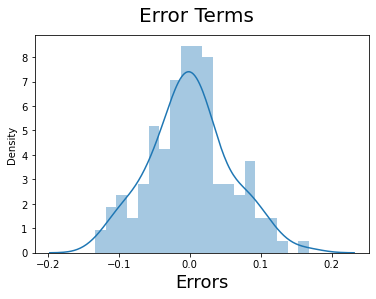

In [86]:
lm = sm.OLS(y_train, X_train_new).fit()
y_train_price = lm.predict(X_train_new)

# Plotting histogram of the error terms by sns.distplot
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

# Error term indicates to be approximately normally distributed and so the assumption of linear modelling seems to fulfil

Text(0.5, 1.0, 'Residuals PDF')

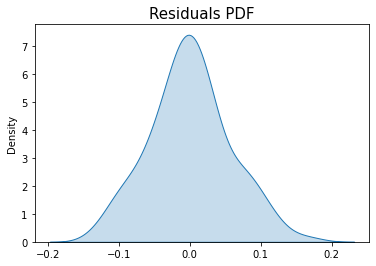

In [87]:
# Plotting histogram of the error terms by sns.kdeplot (another way)

sns.kdeplot(y_train - y_train_price, shade = True)
plt.title("Residuals PDF", size = 15)

In [88]:
reg = LinearRegression()
reg.fit(X_train_new, y_train)

LinearRegression()

In [89]:
# intercept indicates to be sameness bias

reg.intercept_ .round(2)

0.11

In [90]:
# %93 of our data  had fitted very well

reg.score(X_train_new, y_train).round(2)

0.93

In [91]:
# coef indicates to be sameness weights of features

reg.coef_ .round(2)

array([ 0.  ,  0.76, -0.13, -0.09, -0.12, -0.24,  0.11,  0.5 ])

In [92]:
# we show weights as a dataframe

reg_summary = pd.DataFrame(X_train_new.columns.values, columns = ['Features'])

reg_summary['Weights'] = reg.coef_

reg_summary.round(4)

,Features,Weights
0,const,0.0000
1,horsepower,0.7608
2,fueltype_gas,-0.1290
3,aspiration_turbo,-0.0860
4,cylindernumber_six,-0.1191
5,cylindernumber_twelve,-0.2424
6,car_price_range_Medium,0.1114
7,car_price_range_Highend,0.5041


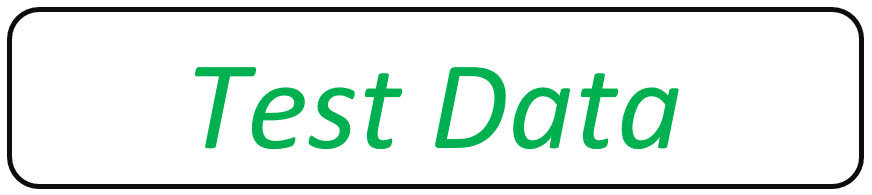

# Prediction and Evaluation


In [93]:
df_test.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_Medium,car_price_range_Highend
95,8249,95.1,2008,97,3.15,69,162.4,63.8,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
15,30760,103.5,3230,209,3.62,182,189.0,66.9,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
30,6855,86.6,1819,92,2.91,76,144.6,63.9,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
159,9258,95.7,2140,98,3.19,70,166.3,64.4,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,11595,94.5,2254,109,3.19,90,159.3,64.2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [94]:
# Now we focus on the test dataset
# scaling the data

num_vars = ['price','wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [95]:
# Divide the data into X and y

y_test = df_test.pop('price')
X_test = df_test

In [96]:
X_test.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_Medium,car_price_range_Highend
95,0.293103,0.143413,0.194245,0.233010,0.047826,0.306897,0.022989,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
15,0.582759,0.737482,1.000000,0.689320,0.539130,0.765517,0.379310,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
30,0.000000,0.051531,0.158273,0.000000,0.078261,0.000000,0.034483,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
159,0.313793,0.207584,0.201439,0.271845,0.052174,0.374138,0.091954,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,0.272414,0.263004,0.280576,0.271845,0.139130,0.253448,0.068966,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [97]:
X_test.shape

(61, 29)

In [98]:
# Calling the LinearRegression and fitting test data

reg = LinearRegression()
reg.fit(X_test, y_test)

LinearRegression()

In [99]:
y_hat_test = reg.predict(X_test)

In [100]:
# Prediction of y_hat_test

df_performance = pd.DataFrame(y_hat_test, columns = ['Prediction'])

df_performance.head()

,Prediction
0,-0.004108
1,0.831740
2,0.050826
3,0.046299
4,0.253164


In [101]:
y_test = y_test.reset_index(drop = True)
df_performance['Target'] = y_test

df_performance.head()

,Prediction,Target
0,-0.004108,0.090395
1,0.831740,0.801890
2,0.050826,0.046335
3,0.046299,0.122286
4,0.253164,0.196150


In [102]:
# Let us use our model to make predictions
X_train_new = X_train_new.drop('const', axis=1)
X_train_new.head()

,horsepower,fueltype_gas,aspiration_turbo,cylindernumber_six,cylindernumber_twelve,car_price_range_Medium,car_price_range_Highend
97,0.228972,1,0,0,0,0,0
31,0.056075,1,0,0,0,0,0
12,0.341121,1,0,1,0,0,1
35,0.130841,1,0,0,0,0,0
119,0.093458,1,0,0,0,0,0


In [103]:
# Dropping variables from X_test and creating a new dataframe
X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,horsepower,fueltype_gas,aspiration_turbo,cylindernumber_six,cylindernumber_twelve,car_price_range_Medium,car_price_range_Highend
95,0.047826,1,0,0,0,0,0
15,0.539130,1,0,1,0,0,1
30,0.078261,1,0,0,0,0,0
159,0.052174,1,0,0,0,0,0
186,0.139130,1,0,0,0,1,0


In [104]:
# Adding constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,horsepower,fueltype_gas,aspiration_turbo,cylindernumber_six,cylindernumber_twelve,car_price_range_Medium,car_price_range_Highend
95,1.0,0.047826,1,0,0,0,0,0
15,1.0,0.539130,1,0,1,0,0,1
30,1.0,0.078261,1,0,0,0,0,0
159,1.0,0.052174,1,0,0,0,0,0
186,1.0,0.139130,1,0,0,0,1,0


In [105]:
# Making Predictions
y_pred = lm.predict(X_test_new)
y_pred.head()

95     0.013874
15     0.772630
30     0.037028
159    0.017182
186    0.194783
dtype: float64

In [106]:
# Model Evaluation (comparing y_pred and y_test)

from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8861941030002229

Text(0, 0.5, 'y_pred')

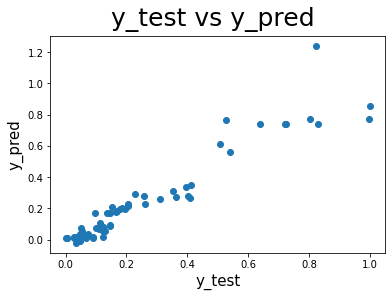

In [107]:
# Further Evaluation using scatterplot between y_test and y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 25)
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 15) 

# Percent Error = |(Target - Prediction) x (100 / Target)|
 
 

See the following link for more details:

https://www.mathsisfun.com/data/percentage-difference-vs-error.html

In [108]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']

df_performance['Percent Error'] = np.absolute(df_performance['Residual'] / df_performance['Target']*100)

df_performance.head().round()

,Prediction,Target,Residual,Percent Error
0,-0.0,0.0,0.0,105.0
1,1.0,1.0,-0.0,4.0
2,0.0,0.0,-0.0,10.0
3,0.0,0.0,0.0,62.0
4,0.0,0.0,-0.0,29.0


In [109]:
df_performance.describe()

,Prediction,Target,Residual,Percent Error
count,61.000000,61.000000,6.100000e+01,6.100000e+01
mean,0.252358,0.252358,-5.323610e-17,inf
std,0.257184,0.261290,4.613756e-02,NaN
min,-0.020467,0.000000,-1.252938e-01,2.700884e-14
25%,0.050826,0.066690,-2.430543e-02,6.968595e+00
50%,0.165301,0.145359,-5.155376e-03,1.430544e+01
75%,0.331253,0.362085,2.836348e-02,4.238933e+01
max,0.942986,1.000000,9.812918e-02,inf


In [110]:
# rectification of Errors

pd.options.display.max_rows = 999
df_performance.sort_values(by = ['Percent Error'], inplace = True)
df_performance = df_performance.drop(index = [0,5,18,46,49,55])
df_performance.round(2)

,Prediction,Target,Residual,Percent Error
28,0.82,0.82,-0.00,0.00
51,0.35,0.35,-0.00,0.00
7,0.15,0.15,-0.00,0.42
27,0.73,0.72,-0.01,1.24
33,0.04,0.04,0.00,3.17
41,0.49,0.51,0.02,3.22
30,0.41,0.39,-0.01,3.40
52,0.32,0.31,-0.01,3.51
1,0.83,0.80,-0.03,3.72
29,0.15,0.14,-0.01,4.14


In [111]:
df_performance.describe().round(2)

,Prediction,Target,Residual,Percent Error
count,55.00,55.00,55.00,55.00
mean,0.28,0.28,-0.00,21.28
std,0.26,0.26,0.04,22.35
min,0.02,0.03,-0.13,0.00
25%,0.09,0.10,-0.02,6.57
50%,0.19,0.16,-0.00,10.87
75%,0.34,0.40,0.03,29.22
max,0.94,1.00,0.10,96.20


In [112]:
# we got Weights(Coef)  of Features

np.round(reg_summary, 4)

,Features,Weights
0,const,0.0000
1,horsepower,0.7608
2,fueltype_gas,-0.1290
3,aspiration_turbo,-0.0860
4,cylindernumber_six,-0.1191
5,cylindernumber_twelve,-0.2424
6,car_price_range_Medium,0.1114
7,car_price_range_Highend,0.5041


In [113]:
# Statistically evaluation of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     253.4
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.22e-73
Time:                        02:39:53   Log-Likelihood:                 203.75
No. Observations:                 141   AIC:                            -391.5
Df Residuals:                     133   BIC:                            -367.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# We can see that the equation of our best fitted line is:
price = 0.7608x(horsepower) - 0.1290x(fueltype_gas) - 0.8060x(aspiration_turbo) + ... + 0.5041x(car_price_range_Highend) + 0.1065

# Conclusion
The R-sqr and Adjusted R-sqr (also known as the extent of fit) is 0.930 and 0.927 respectively,i.e ~ 93% variance is explained
F-statistic is 253.4 and Prob(F-statistic) is 1.22e-73 which is approximately 0.0, hence we can say the Model fit is significant.
The p-values of the coefficients of the independent variables/ predictors are all below the significant level of 0.05, hence we can say that they are statistically significant.